In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau



# READ DATA

In [10]:
# Load the Parkinson's dataset
parkinson_data = pd.read_csv("audio_features_I.csv")

# Extract the features and labels
X = parkinson_data.drop(['name','status'], axis=1) # MFCC feature vectors
y = parkinson_data['status'] # labels (0 = healthy, 1 = Parkinson's)

In [11]:
parkinson_data

,name,status,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,HC_f_i_c,0,-269.07350,66.353860,185.646850,7.897715,-100.958810,-19.586279,-195.660030,-21.654877,-62.401306,-120.911410,-4.210290,-100.678276,-7.354792
1,HC_f_i_c1,0,-450.48570,205.205670,272.529450,90.492320,35.625190,-1.940757,-176.789980,-40.466630,-81.212830,-60.840515,8.775168,-50.195538,47.180020
2,HC_f_i_f,0,-361.32956,175.374570,182.707760,16.704912,-7.187014,-95.439730,-193.817210,-62.394780,-124.953865,20.409529,-54.652430,47.469227,-36.544857
3,HC_f_i_g,0,-401.72800,191.882200,243.485950,37.874638,-119.728220,-27.576942,-225.652340,69.089460,-112.667946,-41.470737,-38.295708,13.833961,-6.681055
4,HC_f_i_g1,0,-545.14484,172.819630,262.874480,38.449368,48.375946,-22.259695,-110.605100,-12.514828,-112.024475,-1.960620,-43.101930,-5.487234,12.214955
5,HC_f_i_m,0,-446.37670,212.696170,221.979420,90.069214,9.024749,10.059669,-152.870200,-27.303305,-132.023730,-34.917458,-16.543144,-34.131847,44.033200
6,HC_f_i_p,0,-352.55826,72.073235,253.621830,-75.001045,-21.031160,-158.928180,-260.652560,-59.213516,-202.066000,-29.483597,37.728240,-17.887060,23.157060
7,HC_f_i_p1,0,-463.82785,205.644000,291.923200,13.707854,-122.255520,2.650832,-242.503780,86.462030,-87.875060,-37.167637,-9.998446,-62.971740,36.685696
8,HC_h_i_a,0,-352.75696,207.418700,228.473070,93.215004,-135.797300,-14.607749,-150.832140,-162.048890,35.350410,-150.497000,-26.583817,-43.045850,14.521584
9,HC_h_i_a1,0,-355.47745,118.019040,196.452160,153.291400,-0.272375,29.518888,-162.862730,-38.974026,-142.763080,-30.114904,-93.440740,14.633948,-62.700275


# Data Splitting

In [12]:
# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)

# Setting callbacks

In [31]:
# callbacks.EarlyStopping : is a method that allows you to specify an arbitrary 
# large number of training epochs and stop training once the model performance
# stops improving on a hold out validation dataset.

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-5,
    restore_best_weights=True,
)


# Reduce learning rate when a metric has stopped improving
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

# Model Creation

In [63]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),  # Dropout for regularization (adjust as needed)
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),  # Add dropout to the second hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                896       
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 32)                2080      
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_50 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [64]:

history = model.fit(X_train, y_train,
                    batch_size=32, epochs=50,
                    validation_data=(X_validation, y_validation),
                    callbacks=[early_stopping, plateau]
                   
                   )


Epoch 1/50
1/1 [==============================] - 1s 514ms/step - loss: 38.8759 - accuracy: 0.5185 - val_loss: 56.4623 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 41.6934 - accuracy: 0.3704 - val_loss: 49.7486 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 34.8748 - accuracy: 0.4815 - val_loss: 43.1110 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 53.1623 - accuracy: 0.4074 - val_loss: 36.7176 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 34.0823 - accuracy: 0.5185 - val_loss: 30.3383 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 22.4122 - accuracy: 0.5556 - val_loss: 24.6080 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 7/50
1/1 [==============================] - 0s 32ms/step - loss: 31.8

1/1 [==============================] - 0s 17ms/step - loss: 3.4721 - accuracy: 0.6000
Test accuracy: 0.6000000238418579


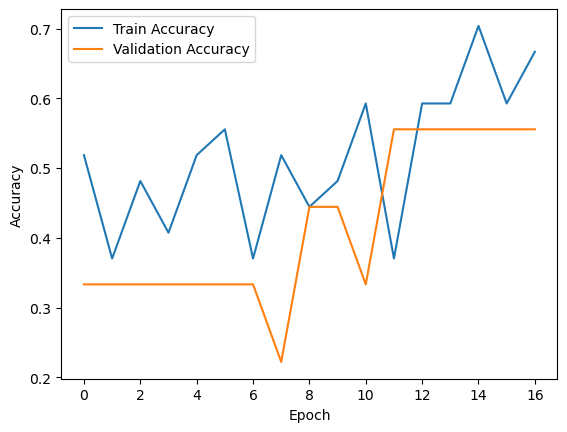

In [65]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
